_**1. WAP to implement the Perceptron Learning Algorithm using numpy in Python. Evaluate performance of a single perceptron for NAND and XOR truth tables as input dataset.**_

### **Code Explanation**

This Python script implements a **Perceptron Learning Algorithm** and evaluates its performance on **NAND** and **XOR** logic gates. Additionally, it visualizes the decision boundaries.

___

### **1\. Importing Required Libraries**

```python
import numpy as np
import matplotlib.pyplot as plt
```

- `numpy` is used for numerical operations.
- `matplotlib.pyplot` is used for visualizing the decision boundary.

___

### **2\. Defining the Perceptron Class**

#### **Initialization**

```python
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=10):
        self.weights = np.random.randn(input_size + 1)  # +1 for bias
        self.learning_rate = learning_rate
        self.epochs = epochs
```

-   The **weights** are randomly initialized, including an extra bias weight.
-   `learning_rate` controls how much the weights update per iteration.
-   `epochs` define how many times the training process repeats.

___

#### **Activation Function**

```python
def activation(self, x):
    return 1 if x >= 0 else 0
```

-   Uses a **step function** (Heaviside function), which outputs:
    -   `1` if input ≥ 0.
    -   `0` otherwise.

___

#### **Prediction Function**

```python
def predict(self, x):
    x = np.insert(x, 0, 1)  # Adding bias term
    return self.activation(np.dot(self.weights, x))

```

-   The input `x` is **augmented** with a bias term.
-   Computes the weighted sum using `np.dot()`, then applies the activation function.

___

#### **Training the Perceptron**

```python
def train(self, X, y):
    for _ in range(self.epochs):
        for xi, target in zip(X, y):
            xi = np.insert(xi, 0, 1)  # Adding bias term
            prediction = self.activation(np.dot(self.weights, xi))
            error = target - prediction
            self.weights += self.learning_rate * error * xi

```

-   The model loops over the dataset multiple times (epochs).
-   For each input `xi`:
    -   **Bias** is added.
    -   Computes **prediction**.
    -   Computes **error** (`target - prediction`).
    -   Updates weights using the **Perceptron Learning Rule**: w\=w+η×error×xw = w + \\eta \\times error \\times xw\=w+η×error×x

___

#### **Evaluating Accuracy**

```python
def evaluate(self, X, y):
    correct = sum(self.predict(x) == target for x, target in zip(X, y))
    accuracy = correct / len(y)
    return accuracy

```

-   Computes accuracy by comparing predictions with actual values.

___

#### **Plotting Decision Boundary**

```python
def plot_decision_boundary(self, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = np.array([self.predict(np.array([x, y])) for x, y in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.show()

```

-   **Creates a grid of points** in the feature space.
-   **Predicts outputs** for each point in the grid.
-   Uses `contourf()` to plot regions of different predictions.
-   **Scatters the original data points** for comparison.

___

### **3\. Training the Perceptron on NAND**

```python
X_nand = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_nand = np.array([1, 1, 1, 0])  # NAND output

perceptron_nand = Perceptron(input_size=2, learning_rate=0.1, epochs=10)
perceptron_nand.train(X_nand, y_nand)
nand_accuracy = perceptron_nand.evaluate(X_nand, y_nand)
print("Perceptron NAND Accuracy:", nand_accuracy)
perceptron_nand.plot_decision_boundary(X_nand, y_nand, "NAND Perceptron Decision Boundary")

```

-   The **NAND gate is linearly separable**, so the perceptron should learn it successfully.
-   Expected **accuracy**: **100%**.
-   The **decision boundary** is plotted.

___

### **4\. Training the Perceptron on XOR**

```python
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])  # XOR output

perceptron_xor = Perceptron(input_size=2, learning_rate=0.1, epochs=10)
perceptron_xor.train(X_xor, y_xor)
xor_accuracy = perceptron_xor.evaluate(X_xor, y_xor)
print("Perceptron XOR Accuracy:", xor_accuracy)
perceptron_xor.plot_decision_boundary(X_xor, y_xor, "XOR Perceptron Decision Boundary")

```

-   The **XOR gate is not linearly separable**, so a **single-layer perceptron fails** to learn it.
-   Expected **accuracy**: **~50%** (random guessing).
-   The **decision boundary** will be incorrect.

___

### **Key Takeaways**

1.  **Perceptrons** can only solve **linearly separable problems** (e.g., NAND).
2.  **XOR requires a multi-layer perceptron (MLP)** or a different model (e.g., Neural Networks).
3.  **Visualization** helps understand how the perceptron separates data.

___

In [ ]:
import numpy as np  # Imports numpy for numerical operations and array handling
import matplotlib.pyplot as plt  # Imports matplotlib for plotting and visualization

class Perceptron:  # Defines the Perceptron class for implementing a single-layer neural network
    def __init__(self, input_size, learning_rate=0.1, epochs=10):  # Constructor initializing perceptron parameters
        self.weights = np.random.randn(input_size + 1)  # Initializes weights with random values (+1 for bias term)
        self.learning_rate = learning_rate  # Stores the learning rate that controls the magnitude of weight updates
        self.epochs = epochs  # Stores the number of epochs (iterations over the entire dataset)
    
    def activation(self, x):  # Defines the activation function (step function)
        return 1 if x >= 0 else 0  # Returns 1 if input is non-negative, otherwise returns 0 (binary output)
    
    def predict(self, x):  # Defines the prediction method for a single input
        x = np.insert(x, 0, 1)  # Adds bias term at the beginning of input array (position 0)
        return self.activation(np.dot(self.weights, x))  # Computes weighted sum and applies activation function
    
    def train(self, X, y):  # Defines the training method that learns from input and output data
        for _ in range(self.epochs):  # Loops through the dataset for the specified number of epochs
            for xi, target in zip(X, y):  # Loops through each training sample and its target output
                xi = np.insert(xi, 0, 1)  # Adds bias term at the beginning of input
                prediction = self.activation(np.dot(self.weights, xi))  # Computes the predicted output
                error = target - prediction  # Calculates the error (target - prediction)
                self.weights += self.learning_rate * error * xi  # Updates weights using the Perceptron Learning Rule
    
    def evaluate(self, X, y):  # Defines the evaluation method to compute accuracy
        correct = sum(self.predict(x) == target for x, target in zip(X, y))  # Counts correct predictions
        accuracy = correct / len(y)  # Computes accuracy as the ratio of correct predictions
        return accuracy  # Returns the calculated accuracy
    
    def plot_decision_boundary(self, X, y, title):  # Defines method to visualize the decision boundary
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # Sets x-axis limits with buffer
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # Sets y-axis limits with buffer
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))  # Creates grid of 100x100 points
        Z = np.array([self.predict(np.array([x, y])) for x, y in zip(xx.ravel(), yy.ravel())])  # Predicts output for each grid point
        Z = Z.reshape(xx.shape)  # Reshapes predictions to match grid shape
        
        plt.contourf(xx, yy, Z, alpha=0.3)  # Fills regions with different colors based on predictions
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')  # Plots the original data points
        plt.title(title)  # Sets the title of the plot
        plt.xlabel("Input 1")  # Labels the x-axis
        plt.ylabel("Input 2")  # Labels the y-axis
        plt.show()  # Displays the plot

Perceptron NAND Accuracy: 1.0


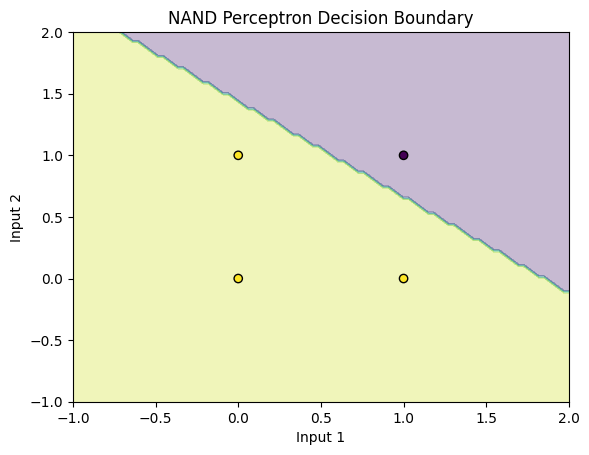

In [ ]:
# NAND Truth Table
X_nand = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Creates input data for NAND gate (all possible 2-bit combinations)
y_nand = np.array([1, 1, 1, 0])  # Expected outputs for NAND gate (opposite of AND gate)

# Train Perceptron for NAND
perceptron_nand = Perceptron(input_size=2, learning_rate=0.1, epochs=100)  # Instantiates a perceptron for NAND with 100 epochs
perceptron_nand.train(X_nand, y_nand)  # Trains the perceptron on the NAND truth table
nand_accuracy = perceptron_nand.evaluate(X_nand, y_nand)  # Evaluates the trained perceptron's accuracy
print("Perceptron NAND Accuracy:", nand_accuracy)  # Prints the NAND gate accuracy
perceptron_nand.plot_decision_boundary(X_nand, y_nand, "NAND Perceptron Decision Boundary")  # Visualizes the decision boundary for NAND

Perceptron XOR Accuracy: 0.5


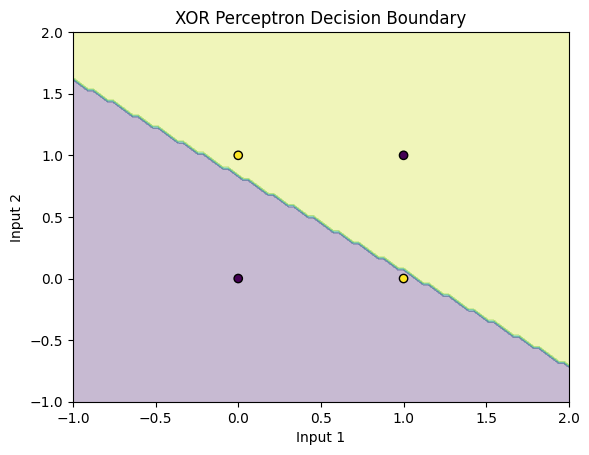

In [ ]:
# XOR Truth Table
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Creates input data for XOR gate (all possible 2-bit combinations)
y_xor = np.array([0, 1, 1, 0])  # Expected outputs for XOR gate (1 when inputs are different)

# Train Perceptron for XOR
perceptron_xor = Perceptron(input_size=2, learning_rate=0.1, epochs=10)  # Instantiates a perceptron for XOR with 10 epochs
perceptron_xor.train(X_xor, y_xor)  # Trains the perceptron on the XOR truth table
xor_accuracy = perceptron_xor.evaluate(X_xor, y_xor)  # Evaluates the trained perceptron's accuracy on XOR
print("Perceptron XOR Accuracy:", xor_accuracy)  # Prints the XOR gate accuracy (expected to be ~50% - not linearly separable)
perceptron_xor.plot_decision_boundary(X_xor, y_xor, "XOR Perceptron Decision Boundary")  # Visualizes the decision boundary for XOR